# Author: Matvei Sutormin
# For datacon 2025
# task_1 ML

In [1266]:
import pandas as pd
data = pd.read_csv('data1.csv', sep = ';')
pd.set_option('display.float_format', '{:.2f}'.format)
data.shape


(14150, 48)

In [1267]:
data.describe()

,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay Variant Accession,Assay Variant Mutation,Source ID,Document Year,Standard Text Value,Value
count,3755.00,14121.00,13957.00,13957.00,11732.00,5825.00,5597.00,5567.00,5567.00,5565.00,14150.00,0.00,0.00,14150.00,12408.00,0.00,11732.00
mean,3.67,383.39,0.28,3.55,623742.66,6.31,17.02,0.34,2.50,10.11,0.05,NaN,NaN,3.24,2010.49,NaN,376.42
std,0.90,132.75,0.60,1.81,15105728.63,1.15,4.43,0.09,1.66,6.55,0.21,NaN,NaN,6.64,8.65,NaN,5487.35
min,-1.00,32.05,0.00,-13.05,-125.00,4.00,2.23,0.10,-6.88,1.56,0.00,NaN,NaN,1.00,1994.00,NaN,-125.00
25%,4.00,319.81,0.00,2.68,40.00,5.46,14.07,0.28,1.53,6.80,0.00,NaN,NaN,1.00,2003.00,NaN,0.79
50%,4.00,376.48,0.00,3.62,240.00,6.28,16.75,0.34,2.60,8.98,0.00,NaN,NaN,1.00,2011.00,NaN,10.00
75%,4.00,423.92,0.00,4.50,10000.00,7.11,19.64,0.40,3.64,11.51,0.00,NaN,NaN,1.00,2018.00,NaN,40.00
max,4.00,2324.38,4.00,14.57,833335724.28,10.70,53.82,0.99,10.72,166.60,1.00,NaN,NaN,71.00,2024.00,NaN,100000.00


# проверим пропуски

In [1268]:
series_with_count_of_nan = data.isna().sum()
series_with_count_of_nan

Molecule ChEMBL ID                0
Molecule Name                  9769
Molecule Max Phase            10395
Molecular Weight                 29
#RO5 Violations                 193
AlogP                           193
Compound Key                      0
Smiles                           72
Standard Type                     1
Standard Relation              2418
Standard Value                 2418
Standard Units                 2172
pChEMBL Value                  8325
Data Validity Comment         13725
Comment                       10430
Uo Units                       2228
Ligand Efficiency BEI          8553
Ligand Efficiency LE           8583
Ligand Efficiency LLE          8583
Ligand Efficiency SEI          8585
Potential Duplicate               0
Assay ChEMBL ID                   0
Assay Description                 0
Assay Type                        0
BAO Format ID                     0
BAO Label                         0
Assay Organism                 7302
Assay Tissue ChEMBL ID      

# уберём где очень много пропусков по порогу, например 9000

In [1269]:
threshold = 9000
cols_with_many_nan = [col_name for col_name in series_with_count_of_nan.index if series_with_count_of_nan[col_name] > threshold]

In [1270]:
cols_with_many_nan

['Molecule Name',
 'Molecule Max Phase',
 'Data Validity Comment',
 'Comment',
 'Assay Tissue ChEMBL ID',
 'Assay Tissue Name',
 'Assay Cell Type',
 'Assay Subcellular Fraction',
 'Assay Parameters',
 'Assay Variant Accession',
 'Assay Variant Mutation',
 'Cell ChEMBL ID',
 'Properties',
 'Action Type',
 'Standard Text Value']

# Оставим тип ативности IC50

In [1271]:
data = data.drop_duplicates()
data = data[data['Standard Type'] == 'IC50']
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

# Удалим столбцы с большим количеством пропусков

In [1272]:
data = data.drop(cols_with_many_nan, axis = 1) #так как здесь очень много пропусков
data = data.drop([col_name for col_name in data.columns if 'ID' in col_name], axis=1)
data = data.drop(['Document Year'], axis = 1)
data.shape

(7974, 26)

In [1273]:
data.isna().sum()

Molecular Weight           13
#RO5 Violations           106
AlogP                     106
Compound Key                0
Smiles                     34
Standard Type               0
Standard Relation        1001
Standard Value           1001
Standard Units            982
pChEMBL Value            2326
Uo Units                  982
Ligand Efficiency BEI    2416
Ligand Efficiency LE     2446
Ligand Efficiency LLE    2446
Ligand Efficiency SEI    2448
Potential Duplicate         0
Assay Description           0
Assay Type                  0
BAO Label                   0
Assay Organism           3663
Target Name                 0
Target Organism             0
Target Type                 0
Source Description          0
Document Journal          968
Value                    1001
dtype: int64

# Посмотрим по одному представителю из стобцов с типом object

In [1274]:
for col_name, dtype in zip(data.dtypes.index, data.dtypes):

    if dtype == 'object':
        print(col_name, data[col_name].iloc[1])

Compound Key 34
Smiles CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1
Standard Type IC50
Standard Relation '='
Standard Units nM
Uo Units UO_0000065
Assay Description Inhibition of Prostaglandin G/H synthase 2 was measured by the inhibition of PGE-2 produced by lipopolysaccharide-challenged HWB
Assay Type B
BAO Label single protein format
Assay Organism nan
Target Name Cyclooxygenase-2
Target Organism Homo sapiens
Target Type SINGLE PROTEIN
Source Description Scientific Literature
Document Journal Bioorg Med Chem Lett


# удалим столбцы в которых написано одно и то же. Можем эти данные сохранить отдельным словарём.

In [1275]:
print(data['Target Type'].value_counts())
print(data['Target Organism'].value_counts())
print(data['Target Name'].value_counts())
print(data['Standard Type'].value_counts())
print(data['Assay Organism'].value_counts())

data = data.drop(['Target Type', 'Target Organism', 'Target Name', 'Standard Type', 'Assay Organism'], axis = 1) # в этих столбцах одно и то же значение, поэтому нет смысла их хранить, их можно просто записать отдельно, но не в датафрейм


Target Type
SINGLE PROTEIN    7974
Name: count, dtype: int64
Target Organism
Homo sapiens    7974
Name: count, dtype: int64
Target Name
Cyclooxygenase-2    7974
Name: count, dtype: int64
Standard Type
IC50    7974
Name: count, dtype: int64
Assay Organism
Homo sapiens              4299
Cercopithecidae              7
Stenostomum acutatum         2
Felis catus                  1
Inhibitor                    1
Canis lupus familiaris       1
Name: count, dtype: int64


In [1276]:
data = data.drop(['Standard Relation', 'Compound Key'], axis = 1)
data

,Molecular Weight,#RO5 Violations,AlogP,Smiles,Standard Value,Standard Units,pChEMBL Value,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay Description,Assay Type,BAO Label,Source Description,Document Journal,Value
1,364.46,0.00,3.49,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,40.00,nM,7.40,UO_0000065,20.30,0.40,3.91,10.62,0,In vitro inhibitory activity against Prostagla...,B,tissue-based format,Scientific Literature,Bioorg Med Chem Lett,0.04
2,372.88,0.00,4.43,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,1700.00,nM,5.77,UO_0000065,15.47,0.32,1.34,9.63,0,Inhibition of Prostaglandin G/H synthase 2 was...,B,single protein format,Scientific Literature,Bioorg Med Chem Lett,1.70
3,413.90,1.00,5.19,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,50.00,nM,7.30,UO_0000065,17.64,0.34,2.11,12.69,0,In vitro inhibitory activity against human Pro...,B,single protein format,Scientific Literature,J Med Chem,0.05
4,357.79,0.00,3.93,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,200.00,nM,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,Inhibition of Prostaglandin G/H synthase 2 in ...,B,cell-based format,Scientific Literature,Bioorg Med Chem Lett,200.00
5,390.46,0.00,4.25,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,10000.00,nM,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,Inhibitory activity against human recombinant ...,B,cell-based format,Scientific Literature,Bioorg Med Chem Lett,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,381.38,0.00,3.51,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,40.00,nM,7.40,UO_0000065,19.40,0.39,3.89,9.49,1,Inhibition of recombinant human COX-2,B,single protein format,Scientific Literature,Eur J Med Chem,0.04
14091,206.28,0.00,3.07,CC(C)Cc1ccc(C(C)C(=O)O)cc1,370000.00,nM,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,Inhibition of COX-2 (unknown origin) by human ...,B,single protein format,Scientific Literature,Eur J Med Chem,370.00
14107,296.15,0.00,4.36,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,1100.00,nM,5.96,UO_0000065,20.12,0.43,1.60,12.08,0,Inhibition of COX-2 (unknown origin) at 10 uM,B,single protein format,Scientific Literature,Eur J Med Chem,1.10
14125,261.71,0.00,4.09,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,880.00,nM,6.06,UO_0000065,23.14,0.46,1.97,12.28,0,Inhibition of human recombinant COX-2 using ar...,B,single protein format,Scientific Literature,Eur J Med Chem,0.88


# посмотрим на единицы измерения

In [1277]:
print(data['Uo Units'].value_counts())
print(data['Standard Units'].value_counts())

values_to_exclude = ['UO_0000023', 'UO_0000187', 'UO_0000274'] # удалим одиночные значения с единицами измерения и оставим только наномоль/литр
data = data[~data['Uo Units'].isin(values_to_exclude)] 


Uo Units
UO_0000065    6965
UO_0000274      25
UO_0000023       1
UO_0000187       1
Name: count, dtype: int64
Standard Units
nM         6965
ug.mL-1      25
ug            1
%             1
Name: count, dtype: int64


UO_0000065 - 10^-9 mol/L (nanomolar/L)



UO_0000274 - microgram per milliliter 

In [1278]:
data = data.drop(['Assay Description', 'BAO Label', 'Source Description', 'Document Journal', 'Potential Duplicate', 'Assay Type'], axis =1 ) #столбцы не отражают биологическую активность
data = data.drop(['Uo Units', 'Standard Units'], axis = 1) # одно и то же. Так же можно сохранить в словарь
data = data.drop(['Value'], axis = 1) # так как это значение уже есть в столбце Standard Value

# посмотрим на одинаковые молекулы 

In [1279]:
data.Smiles.value_counts()

Smiles
Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1                              218
COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1                                  121
CS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)OC2)cc1                                       63
CC(C)Cc1ccc(C(C)C(=O)O)cc1                                                       37
O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl                                                   26
                                                                               ... 
O=C(O)C1=Cc2c(ccc(Cl)c2-c2ccccc2)OC1C(F)(F)F                                      1
O=C(O)C1=Cc2c(ccc(Cl)c2Sc2ccccc2)OC1C(F)(F)F                                      1
CS(=O)(=O)c1ccc(C2=C(c3ccccc3O)C(=O)OC2)cc1                                       1
Bc1ccc(C(NC(=O)c2cc(-c3ccccc3Cl)n(-c3ccc(S(N)(=O)=O)cc3)n2)P(=O)(OCC)OCC)cc1      1
Cc1c(Cl)cccc1Nc1ccccc1C(=O)O                                                      1
Name: count, Length: 6014, dtype: int64

In [1280]:
data

,Molecular Weight,#RO5 Violations,AlogP,Smiles,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
1,364.46,0.00,3.49,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,40.00,7.40,20.30,0.40,3.91,10.62
2,372.88,0.00,4.43,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,1700.00,5.77,15.47,0.32,1.34,9.63
3,413.90,1.00,5.19,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,50.00,7.30,17.64,0.34,2.11,12.69
4,357.79,0.00,3.93,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,200.00,NaN,NaN,NaN,NaN,NaN
5,390.46,0.00,4.25,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,10000.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14087,381.38,0.00,3.51,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,40.00,7.40,19.40,0.39,3.89,9.49
14091,206.28,0.00,3.07,CC(C)Cc1ccc(C(C)C(=O)O)cc1,370000.00,NaN,NaN,NaN,NaN,NaN
14107,296.15,0.00,4.36,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,1100.00,5.96,20.12,0.43,1.60,12.08
14125,261.71,0.00,4.09,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,880.00,6.06,23.14,0.46,1.97,12.28


In [1281]:
# для одинаковых Smiles оставим только одно значение, которое будет представлять собой моду сгрупированной по smiles чтобы потом удалить дубликаты

numeric_cols = data.select_dtypes('number').columns
import numpy as np
for i in numeric_cols:
    data = data.assign(
        **{f'mode_of_{i}': data.groupby('Smiles')[i].transform(
            lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
        )}
    ).sort_values(by='Smiles')

data.drop(columns=numeric_cols, inplace=True)
data.drop_duplicates(subset=['Smiles'], inplace=True)

zipp = zip(numeric_cols, data.select_dtypes('number').columns)
for base_name, new_name in zipp:
    data.rename(columns={new_name : base_name} ,inplace=True)

# Теперь одинаковых молекул нет

In [1282]:
data.isna().sum()# в последних 5 столбцах 1/3 пропусков. надо подумать как их обработать, потому что если убирать, то останется мало данных

Smiles                      1
Molecular Weight            1
#RO5 Violations            73
AlogP                      73
Standard Value            915
pChEMBL Value            1952
Ligand Efficiency BEI    2016
Ligand Efficiency LE     2046
Ligand Efficiency LLE    2046
Ligand Efficiency SEI    2048
dtype: int64

In [1283]:
data = data.sort_index()
data.reset_index(drop=True, inplace=True)
data 

,Smiles,Molecular Weight,#RO5 Violations,AlogP,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.00,3.49,40.00,7.40,20.30,0.40,3.91,10.62
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.00,5.19,50.00,7.30,17.64,0.34,2.11,12.69
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.00,4.25,10000.00,NaN,NaN,NaN,NaN,NaN
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.00,5.66,4500.00,5.35,16.89,0.32,-0.31,20.33
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.00,5.28,190.00,6.72,11.71,0.22,1.44,7.48
...,...,...,...,...,...,...,...,...,...,...
6010,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.00,6.00,14700.00,4.83,12.25,0.23,-1.17,6.91
6011,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.00,1.85,NaN,NaN,NaN,NaN,NaN,NaN
6012,Nc1ccc(O)c(C(=O)O)c1,153.14,0.00,0.67,7530.00,5.12,33.45,0.64,4.45,6.13
6013,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.00,4.09,880.00,6.06,23.14,0.46,1.97,12.28


# Обработаем пропуски с помощью IterativeImputer 

In [1284]:

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge 
imputer_iterative = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42
)

df_iterative_imputed_array = imputer_iterative.fit_transform(data[numeric_cols])
df_iterative_imputed = pd.DataFrame(df_iterative_imputed_array, columns=data[numeric_cols].columns)

pos_cols = [] # уберём отрицательные значения из тех столбцов, где их не было
for i in numeric_cols:
    if data[data[i] < 0][i].count() == 0:
        pos_cols.append(i)
        
df_iterative_imputed[df_iterative_imputed[pos_cols] < 0] = 0

data.drop(columns=numeric_cols, inplace=True)
data = pd.concat([data, df_iterative_imputed], axis=1)
data.dropna(inplace=True) 


In [1285]:
data.isna().sum() # теперь нет пропусков

Smiles                   0
Molecular Weight         0
#RO5 Violations          0
AlogP                    0
Standard Value           0
pChEMBL Value            0
Ligand Efficiency BEI    0
Ligand Efficiency LE     0
Ligand Efficiency LLE    0
Ligand Efficiency SEI    0
dtype: int64

In [1286]:
from rdkit import Chem 
def check_smiles_validity(smiles_string): 
    """
    Проверяет валидность SMILES строки с использованием RDKit.
    Возвращает True, если SMILES строка валидна, False в противном случае.
    """
    mol = Chem.MolFromSmiles(smiles_string)
    return mol is not None

data['is_valid'] = data['Smiles'].apply(check_smiles_validity)

In [1287]:
data.is_valid.value_counts() # все молекулы валидны

is_valid
True    6014
Name: count, dtype: int64

In [1288]:
data = data.drop(columns=['is_valid']) # уберем столбец, так как он уже не нужен

========== Molecular Weight ==========


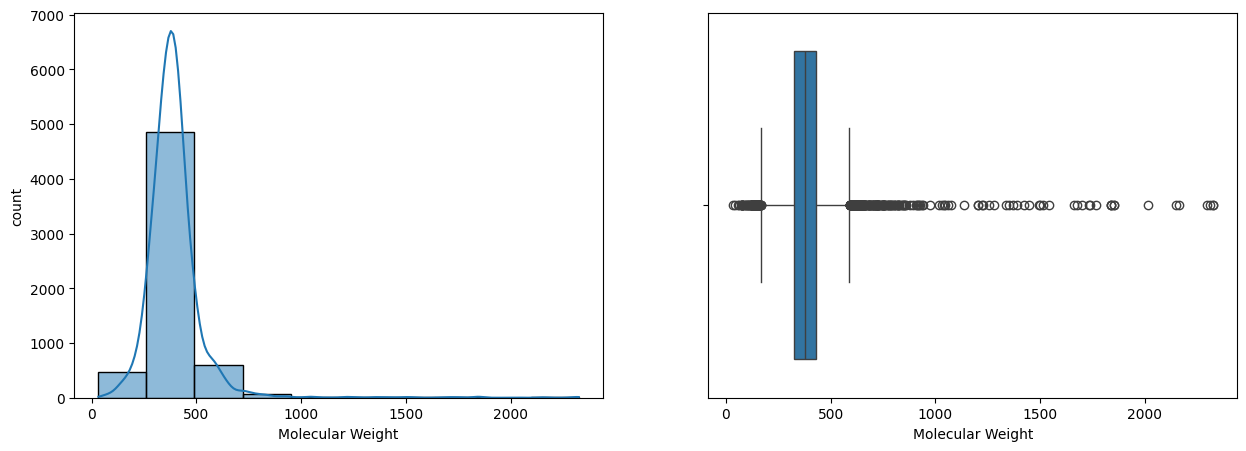

========== #RO5 Violations ==========


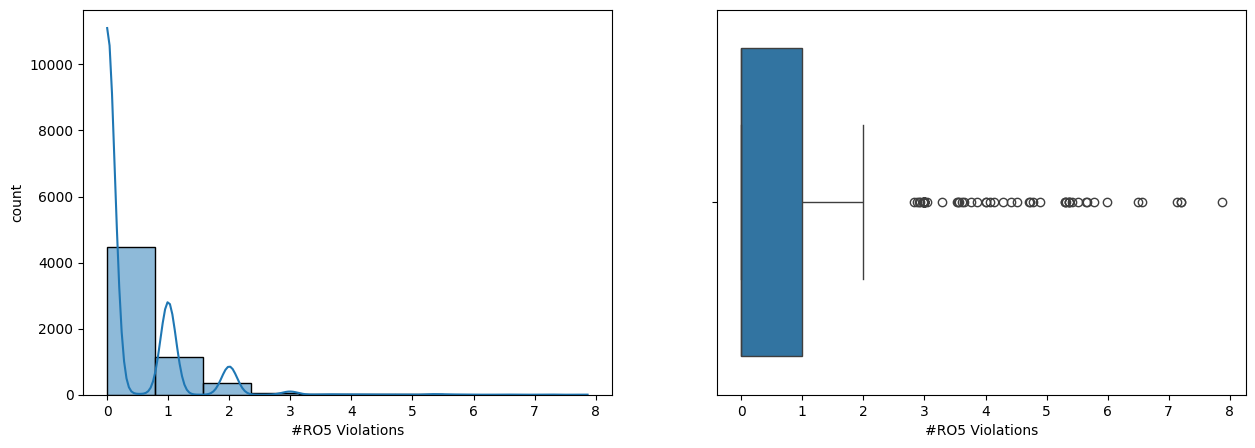

========== AlogP ==========


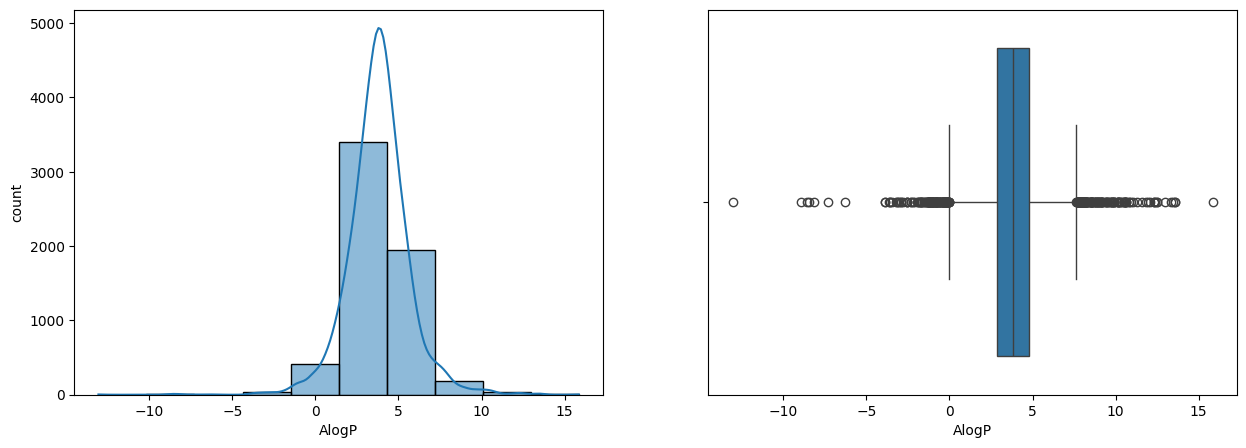

========== Standard Value ==========


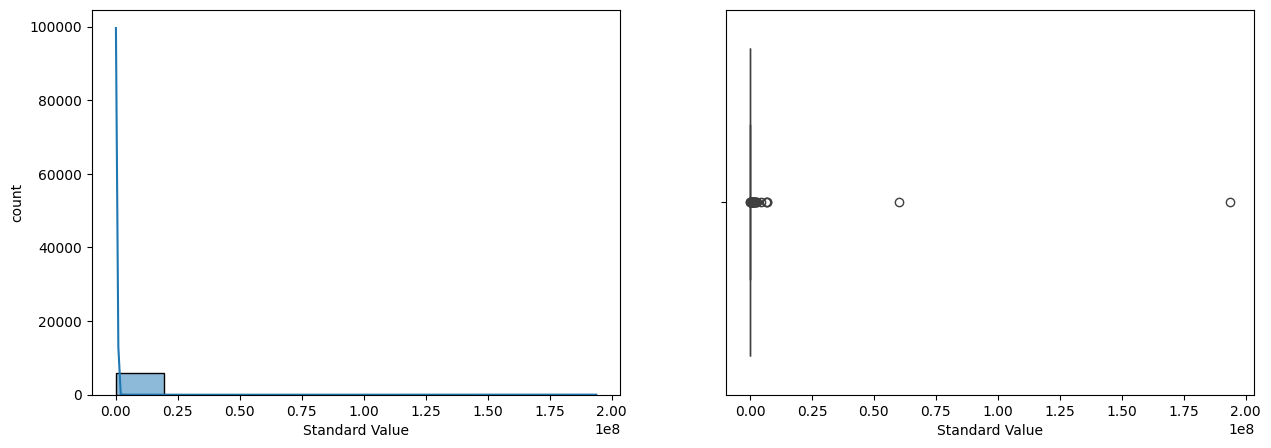

========== pChEMBL Value ==========


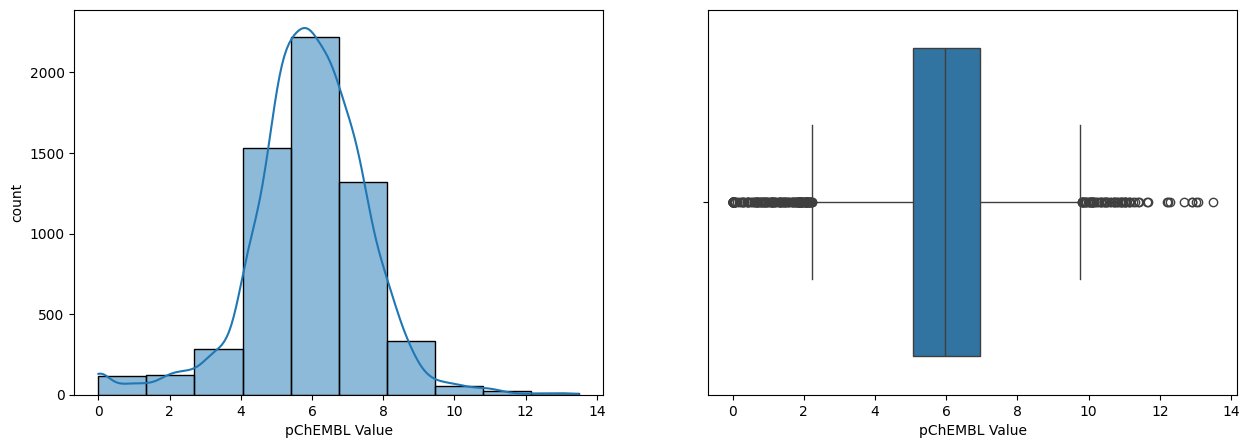

========== Ligand Efficiency BEI ==========


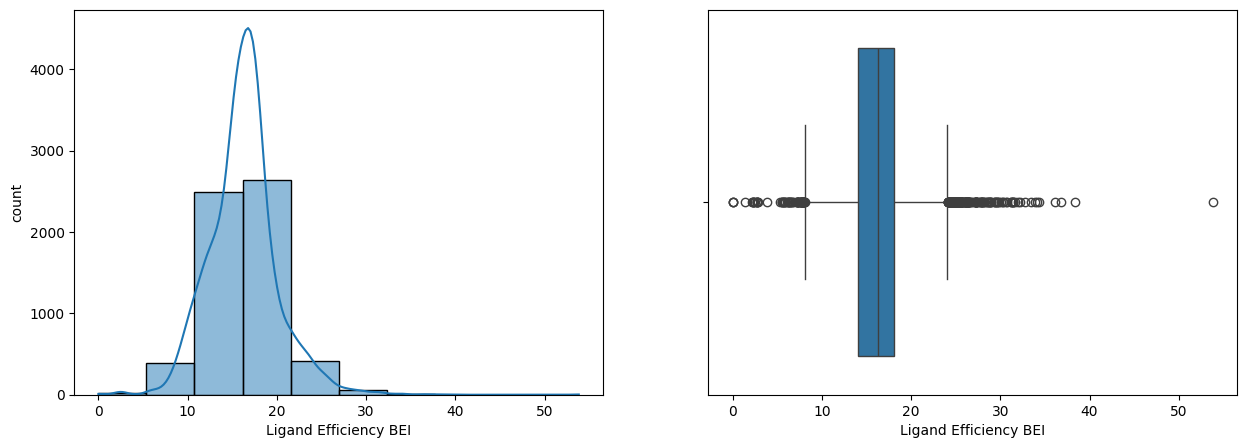

========== Ligand Efficiency LE ==========


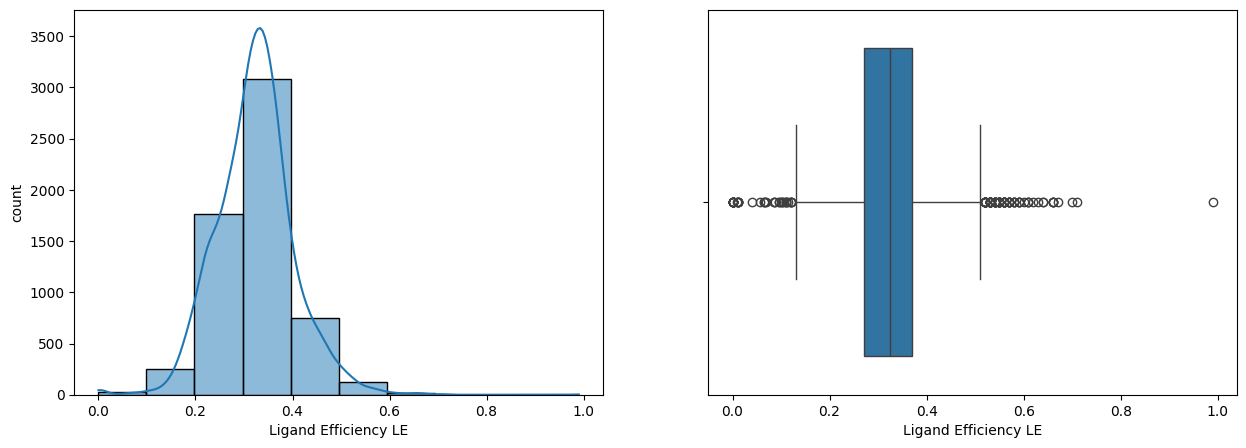

========== Ligand Efficiency LLE ==========


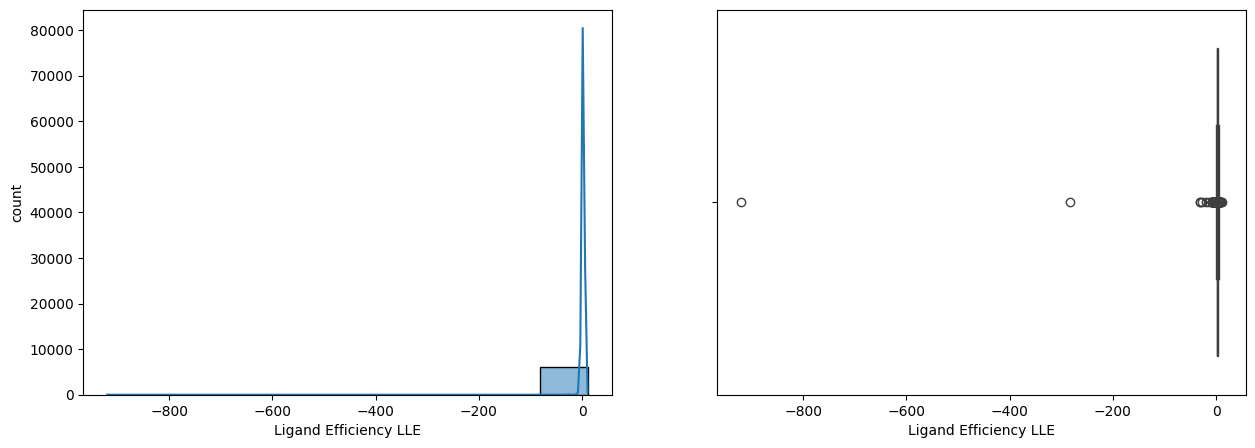

========== Ligand Efficiency SEI ==========


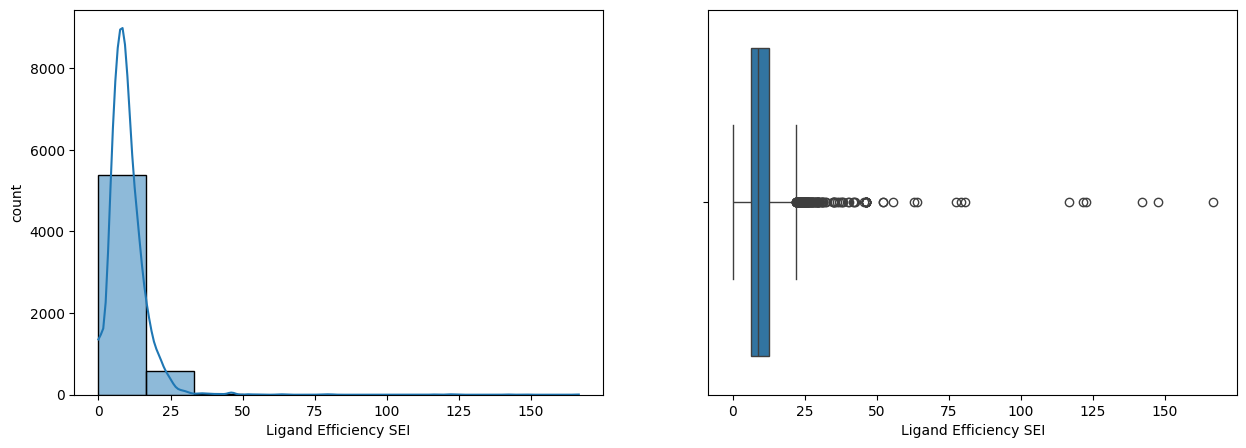

In [1289]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numeric_cols:
    fig, axes = plt.subplots(1,2, figsize = (15, 5))
    
    cur_col = data[feature]
    
    print('='* 10, feature, '=' * 10)

    sns.histplot( x = cur_col, ax =  axes[0], bins = 10, kde=True)
    #sns.histplot(x = cur_col, ax = axes[1])
    axes[0].set_ylabel('count')
    
    sns.boxplot(x = cur_col, ax = axes[1])
    
    plt.show()
    

# Удалю явные выбросы, потому что boxplot вылядит не информативно

In [1290]:
data = data[data['Standard Value'] < 50000000]
data = data[data['Ligand Efficiency LLE'] > -200]

========== Molecular Weight ==========


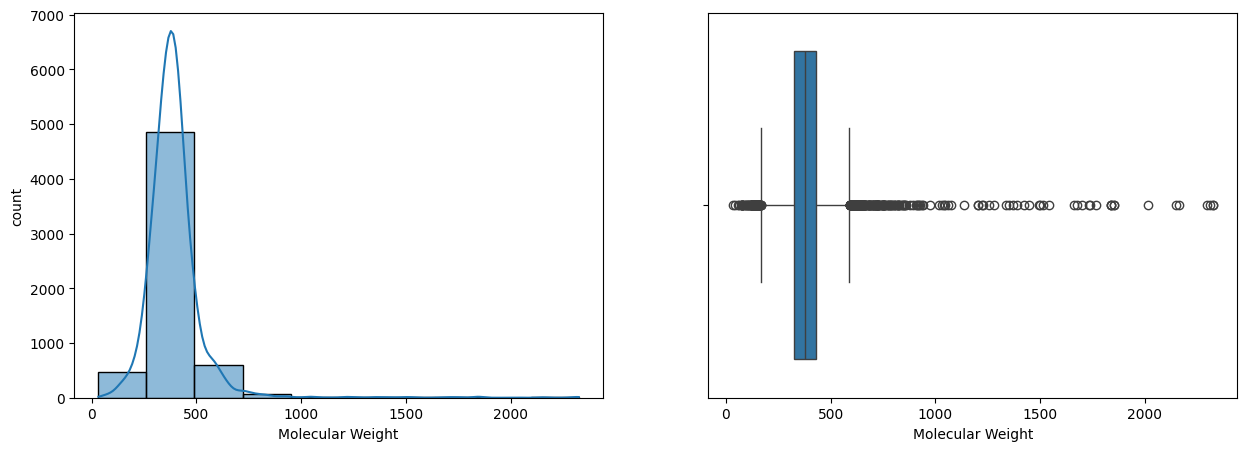

========== #RO5 Violations ==========


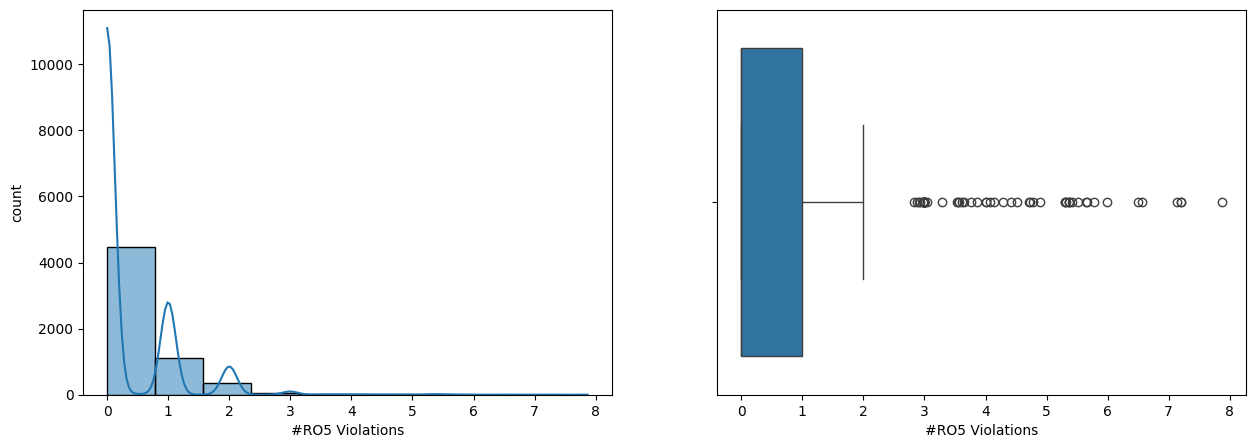

========== AlogP ==========


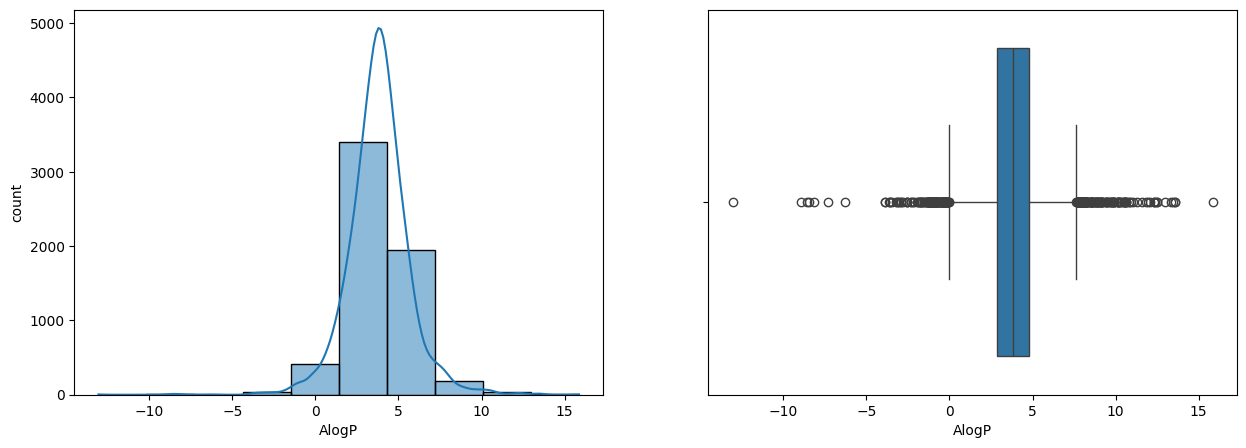

========== Standard Value ==========


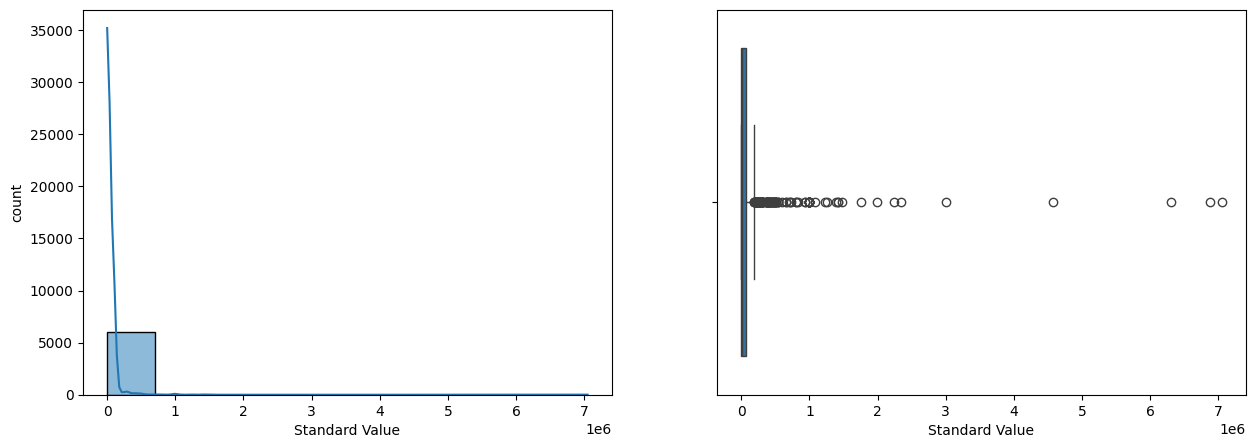

========== pChEMBL Value ==========


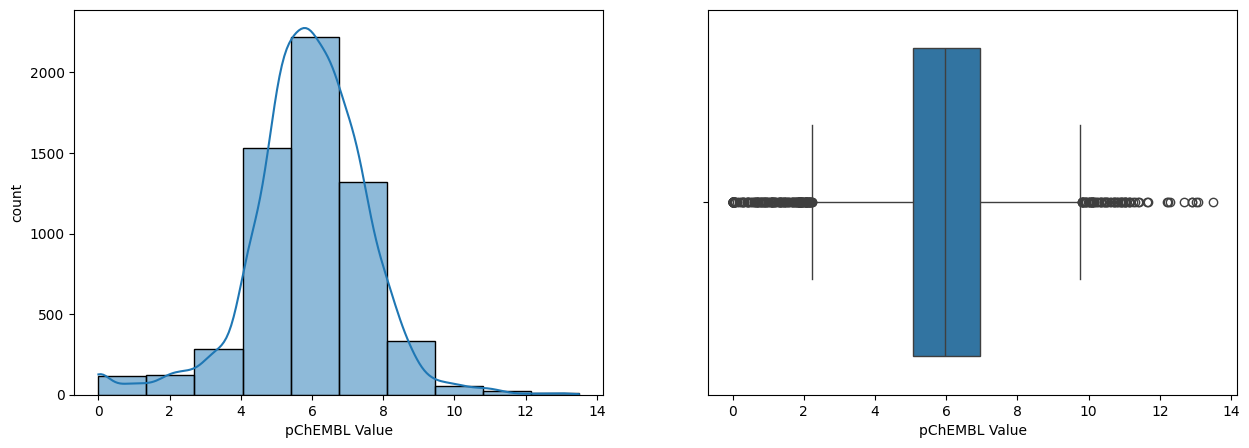

========== Ligand Efficiency BEI ==========


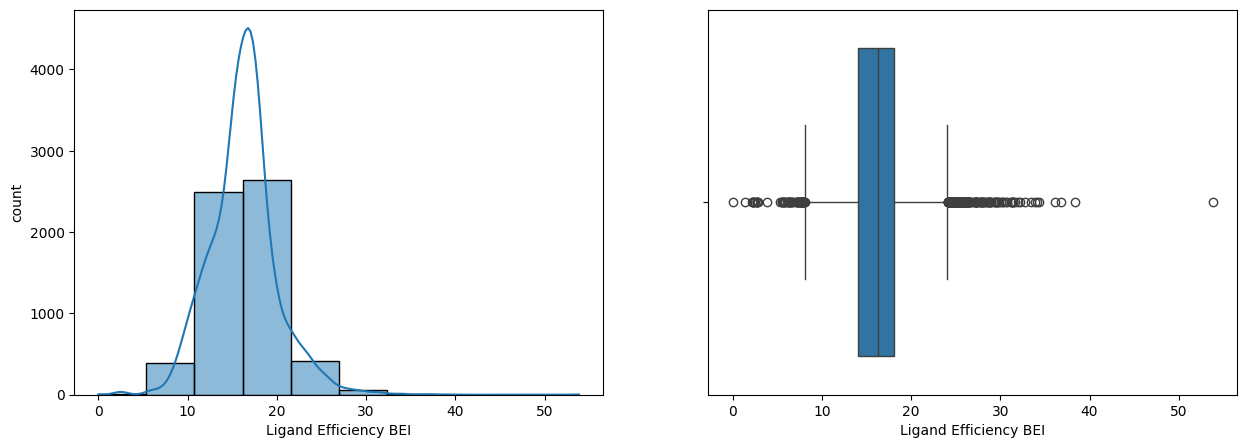

========== Ligand Efficiency LE ==========


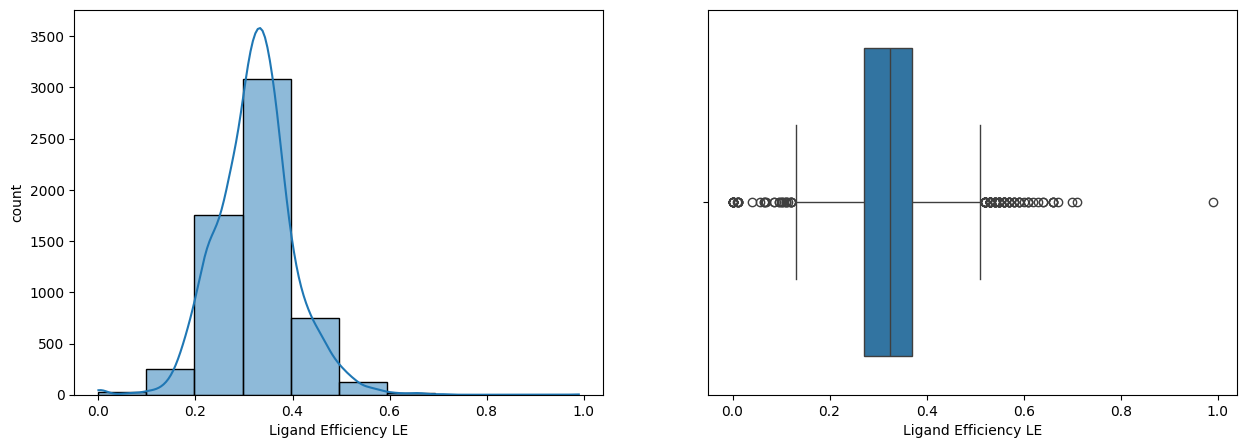

========== Ligand Efficiency LLE ==========


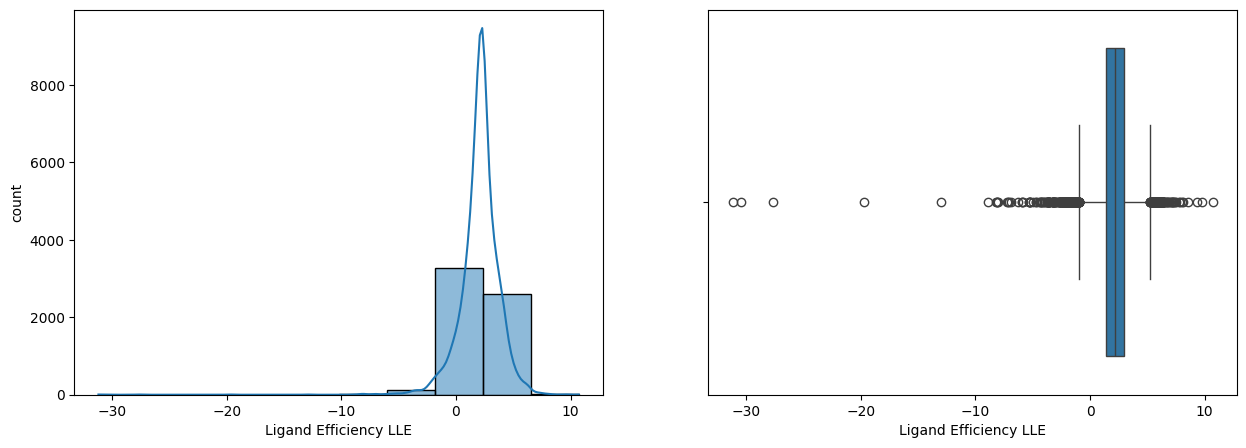

========== Ligand Efficiency SEI ==========


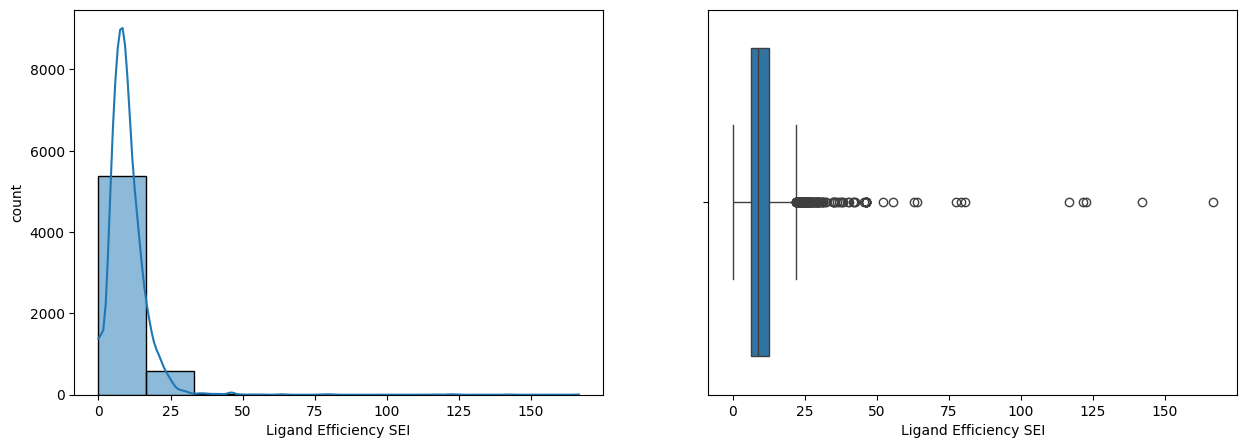

In [1291]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numeric_cols:
    fig, axes = plt.subplots(1,2, figsize = (15, 5))
    
    cur_col = data[feature]
    
    print('='* 10, feature, '=' * 10)

    sns.histplot( x = cur_col, ax =  axes[0], bins = 10, kde=True)
    #sns.histplot(x = cur_col, ax = axes[1])
    axes[0].set_ylabel('count')
    
    sns.boxplot(x = cur_col, ax = axes[1])
    
    plt.show()

In [1292]:

dop_info = {'Target Type' : 'SINGLE PROTEIN', 'Target Organism' : 'Homo sapiens', 'Target Name' : 'Cyclooxygenase-2', 'Standard Type' : 'IC50', 'Standard Units' :'nM', 'Uo Units':'UO_0000065'}